# ベイズ検定と通常の検定の関係

* 黒木玄
* 2022年7月20日
$
\newcommand\op{\operatorname}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\Normal{\op{Normal}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\pdf{\op{pdf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ccdf{\op{ccdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\BF{\op{BF}}
$

このノートでは, 二項分布モデルを使った比率に関するPearsonのχ²検定(これを通常の検定の典型例とみなす)と平坦事前分布 $\Beta(1,1)$ でのベイズ検定の比較を行う.

__結論:__ ベイズ検定は通常の検定において有意水準を $n$ と共に小さくして行く場合に一致する.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#二項分布モデルでのPearsonのχ²検定" data-toc-modified-id="二項分布モデルでのPearsonのχ²検定-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>二項分布モデルでのPearsonのχ²検定</a></span></li><li><span><a href="#二項分布モデルでのベイズ検定と通常の検定の比較" data-toc-modified-id="二項分布モデルでのベイズ検定と通常の検定の比較-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>二項分布モデルでのベイズ検定と通常の検定の比較</a></span></li><li><span><a href="#数値的確認" data-toc-modified-id="数値的確認-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数値的確認</a></span></li></ul></div>

## 二項分布モデルでのPearsonのχ²検定

「$n$ 回中 $k$ 回成功した」の形のデータに関する統計モデルとして二項分布

$$
P(k|n,p) = \binom{n}{k} p^k (1-p)^{n-k}
$$

を採用したとする. ここで $0\le p \le 1$ は成功確率を意味するモデルのパラメータである.

このとき, 仮説 $p=p_0$ に関するPearsonの $\chi^2$ 統計量は次のように定義される:

$$
\chi^2(k|n,p_0) = \frac{(k - np_0)^2}{np_0(1-p_0)}.
$$

$k$ が仮説 $p=p_0$ の下での統計モデルに従うとき, $n$ が十分大きいならば, このPearsonの $\chi^2$ 統計量は自由度 $1$ の $\chi^2$ 分布に近似的に従うことが知られている.  このことを使って, 仮説 $p=p_0$ のP値が次のように定義される:

$$
\pvalue(k|n,p=p_0) = \ccdf(\Chisq(1), \chi^2(k|n,p_0)).
$$

このとき, 有意水準 $\alpha$ について

$$
\chi^2_\alpha = \quantile
(\Chisq(1), 1-\alpha)
$$

とおくと,

$$
\text{仮説 $p=p_0$ が有意水準 $\alpha$ で棄却される} \iff \chi^2(k|n,p_0) > \chi^2_\alpha.
$$ 


## 二項分布モデルでのベイズ検定と通常の検定の比較

「$n$ 回中 $k$ 回成功」というデータを使って, 平坦事前分布の場合とデルタ事前分布 $p=p_0$ の場合を比較してみよう.

平坦事前分布の周辺尤度は

$$
Z_1(k|n) = \int_0^1 \binom{n}{k} p^k(1-p)^{n-k}\,dp = \binom{n}{k}B(k+1,n-k+1) = \frac{1}{n+1}
$$

最後の等号で次を使った:

$$
B(k+1, n-k+1) = \frac{\Gamma(k+1)\Gamma(n-k+1)}{\Gamma(n+2)} =
\frac{k!(n-k)!}{(n+1)!} = \frac{1}{n+1}\binom{n}{k}^{-1}.
$$

デルタ事前分布 $p=p_0$ の周辺尤度は

$$
Z_0(k|n) = \int_0^1 \binom{n}{k} p^k(1-p)^{n-k}\delta(p-p_0)\,dp = \binom{n}{k} p_0^k(1-p_0)^{n-k}.
$$

ゆえに, ベイズ因子は次のようになる:

$$
\BF_{01} = \frac{Z_0(k|n)}{Z_1(k|n)} = (n+1)\binom{n}{k} p_0^k(1-p_0)^{n-k}.
$$

二項分布の中心極限定理より, $n$ が十分大きなとき($n=10$ 程度ですでにそれなりに良い近似になる), これは次のように近似される:

$$
\BF_{01} \approx
\frac{n+1}{\sqrt{2\pi np_0(1-p_0)}}\exp\left(-\frac{(k-np_0)^2}{2np_0(1-p_0)}\right) =
\frac{n+1}{\sqrt{2\pi np_0(1-p_0)}}\exp\left(-\frac{\chi^2(k|n,p_0)}{2}\right).
$$

したがって,

$$
\begin{aligned}
-2\log\BF_{01} &=
2\log Z_1(k|n) - 2\log Z_0(k|n)
\\ &\approx
-2\log(n+1) + \log(2\pi) + \log n + \log(p_0(1-p_0)) + \chi^2(k|n,p_0)
\\ &=
-\log\frac{(n+1)^2}{n} + \log(p_0(1-p_0)) + \log(2\pi) + \chi^2(k|n,p_0)
\end{aligned}
$$

このとき, $0 < C < 1$ に関するベイズ検定の条件 $\BF_{01} < C$ は

$$
\chi^2(n, p_0, C) = -2\log C + \log\frac{(n+1)^2}{n} - \log(p_0(1-p_0)) - \log(2\pi)
$$

とおいたときの, 

$$
\chi^2(k|n,p_0) > \chi^2(n, p_0, C)
$$

という条件と近似的に同値である. 

したがって, $n$ に依存して決まる有意水準 $\alpha_n(p_0, C)$ を

$$
\alpha_n(p_0, C) = \ccdf(\Chisq(1), \chi^2(n, p_0, C))
$$

と定めると, 次の2つの条件は互いに近似的に同値になる:

* $\BF_{01} < C$.
* 仮説 $p=p_0$ が有意水準 $\alpha_n(p_0, C)$ で棄却される.

$\alpha_n(p_0, C)$ は $n$ を大きくすると小さくなることに注意せよ.

以上の結果は, __ベイズ検定は標本サイズを大きくしたときそれに適切に合わせて有意水準を小さくした場合の通常の検定に近似的に同値である__ ことを意味している.

__注意:__ 以上では二項分布モデルという特別な場合のみを扱ったが, 以上の事実はかなり一般的に成立している. そのことを数学的に確認したい人は渡辺澄夫著『ベイズ統計の理論と方法』の第3章を読めばよい.

## 数値的確認

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, size=(400, 250),
    titlefontsize=10, tickfontsize=7, guidefontsize=9)

例えば, $C=0.1$, $p_0=0.5$ のとき, $\alpha_n(p_0, C)$ は以下のようになる.

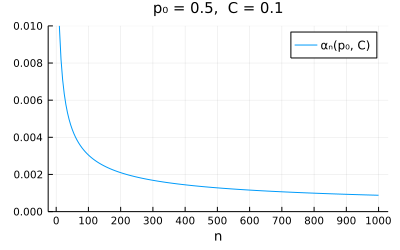

In [2]:
function alpha(n, p₀, C)
    χ² = -2log(C) + log((n+1)^2/n) - log(p₀*(1-p₀)) - log(2π)
    ccdf(Chisq(1), χ²)
end

C = 0.1
p₀ = 0.5
ns = 5:5:1000
plot(ns, n -> alpha(n, p₀, C); label="αₙ(p₀, C)")
title!("p₀ = $p₀,  C = $C")
plot!(xtick=0:100:1000, xguide="n", ylim=(0, 0.01))

このように, $n$ とともに $\alpha_n(p_0, C)$ はどんどん小さくなる.

$C=1$, $p_0=0.5$ のとき($C=1$ はベイズ自由エネルギーによるモデル選択の場合に対応), $\alpha_n(p_0, C)$ は以下のようになる.

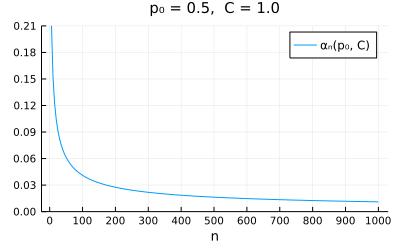

In [3]:
C = 1.0
p₀ = 0.5
ns = 5:5:1000
plot(ns, n -> alpha(n, p₀, C); label="αₙ(p₀, C)")
title!("p₀ = $p₀,  C = $C")
plot!(xtick=0:100:1000, xguide="n", ylim=(0, 0.21))

$-2\log\BF_{10}$ の近似式も数値的に確認してみよう.

In [4]:
chisq(k, n, p₀) = (k - n*p₀)^2/(n*p₀*(1-p₀))

logZ0(k, n, p₀) = logpdf(Binomial(n, p₀), k)
logZ1(k, n) = -log(n+1)
neg2logBF01(k, n, p₀) = 2logZ1(k, n) - 2logZ0(k, n, p₀)

neg2logBF01_approx(k, n, p₀) = 
    -2log(n+1) + log(2π) + log(n*p₀*(1-p₀)) + chisq(k, n, p₀)

neg2logBF01_approx (generic function with 1 method)

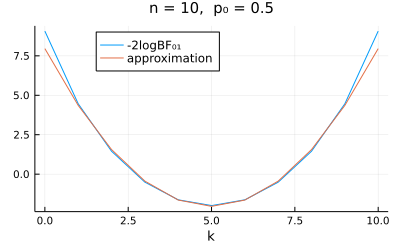

In [5]:
n, p₀ = 10, 0.5
μ, σ = n*p₀, √(n*p₀*(1-p₀))
ks = max(0, round(Int, μ-4σ)):min(n, round(Int, μ+4σ))
plot(legend=:top)
plot!(ks, k -> neg2logBF01(k, n, p₀); label="-2logBF₀₁")
plot!(ks, k -> neg2logBF01_approx(k, n, p₀); label="approximation")
plot!(xguide="k")
title!("n = $n,  p₀ = $p₀")

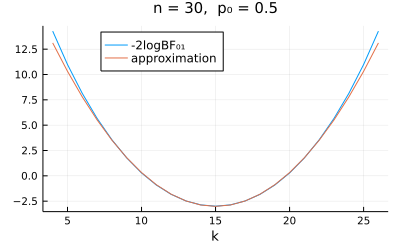

In [6]:
n, p₀ = 30, 0.5
μ, σ = n*p₀, √(n*p₀*(1-p₀))
ks = max(0, round(Int, μ-4σ)):min(n, round(Int, μ+4σ))
plot(legend=:top)
plot!(ks, k -> neg2logBF01(k, n, p₀); label="-2logBF₀₁")
plot!(ks, k -> neg2logBF01_approx(k, n, p₀); label="approximation")
plot!(xguide="k")
title!("n = $n,  p₀ = $p₀")

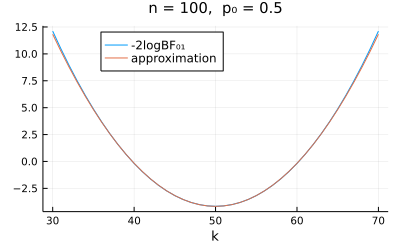

In [7]:
n, p₀ = 100, 0.5
μ, σ = n*p₀, √(n*p₀*(1-p₀))
ks = max(0, round(Int, μ-4σ)):min(n, round(Int, μ+4σ))
plot(legend=:top)
plot!(ks, k -> neg2logBF01(k, n, p₀); label="-2logBF₀₁")
plot!(ks, k -> neg2logBF01_approx(k, n, p₀); label="approximation")
plot!(xguide="k")
title!("n = $n,  p₀ = $p₀")

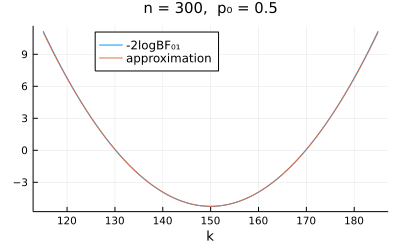

In [8]:
n, p₀ = 300, 0.5
μ, σ = n*p₀, √(n*p₀*(1-p₀))
ks = max(0, round(Int, μ-4σ)):min(n, round(Int, μ+4σ))
plot(legend=:top)
plot!(ks, k -> neg2logBF01(k, n, p₀); label="-2logBF₀₁")
plot!(ks, k -> neg2logBF01_approx(k, n, p₀); label="approximation")
plot!(xguide="k")
title!("n = $n,  p₀ = $p₀")

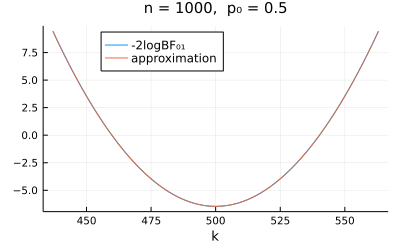

In [9]:
n, p₀ = 1000, 0.5
μ, σ = n*p₀, √(n*p₀*(1-p₀))
ks = max(0, round(Int, μ-4σ)):min(n, round(Int, μ+4σ))
plot(legend=:top)
plot!(ks, k -> neg2logBF01(k, n, p₀); label="-2logBF₀₁")
plot!(ks, k -> neg2logBF01_approx(k, n, p₀); label="approximation")
plot!(xguide="k")
title!("n = $n,  p₀ = $p₀")

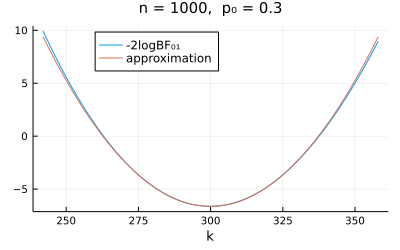

In [10]:
n, p₀ = 1000, 0.3
μ, σ = n*p₀, √(n*p₀*(1-p₀))
ks = max(0, round(Int, μ-4σ)):min(n, round(Int, μ+4σ))
plot(legend=:top)
plot!(ks, k -> neg2logBF01(k, n, p₀); label="-2logBF₀₁")
plot!(ks, k -> neg2logBF01_approx(k, n, p₀); label="approximation")
plot!(xguide="k")
title!("n = $n,  p₀ = $p₀")